In [1]:
import pandas as pd

In [2]:
vendors = pd.read_csv("../train/vendors.csv")

In [3]:
# Display the first few rows of the vendors DataFrame
vendors.head()

,id,authentication_id,latitude,longitude,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,...,open_close_flags,vendor_tag,vendor_tag_name,one_click_vendor,country_id,city_id,created_at,updated_at,device_type,display_orders
0,4,118597,-0.588596,0.754434,Restaurants,2,0.0,6,1,11:00AM-11:30PM,...,1,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",Y,1,1,1/30/2023 14:42,4/7/2025 15:12,3,1
1,13,118608,-0.471654,0.744470,Restaurants,2,0.7,5,1,08:30AM-10:30PM,...,1,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",Y,1,1,5/3/2023 12:32,4/5/2025 20:46,3,1
2,20,118616,-0.407527,0.643681,Restaurants,2,0.0,8,1,08:00AM-10:45PM,...,1,"4,8,91,10","Breakfast,Desserts,Free Delivery,Indian",Y,1,1,5/4/2023 22:28,4/7/2025 16:35,3,1
3,23,118619,-0.585385,0.753811,Restaurants,2,0.0,5,1,10:59AM-10:30PM,...,1,"5,8,30,24","Burgers,Desserts,Fries,Salads",Y,1,1,5/6/2023 19:20,4/2/2025 0:56,3,1
4,28,118624,0.480602,0.552850,Restaurants,2,0.7,15,1,11:00AM-11:45PM,...,1,5,Burgers,Y,1,1,5/17/2023 22:12,4/5/2025 15:57,3,1


In [4]:
vendors.info() # Display information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    100 non-null    int64  
 1   authentication_id     100 non-null    int64  
 2   latitude              100 non-null    float64
 3   longitude             100 non-null    float64
 4   vendor_category_en    100 non-null    object 
 5   vendor_category_id    100 non-null    int64  
 6   delivery_charge       100 non-null    float64
 7   serving_distance      100 non-null    int64  
 8   is_open               100 non-null    int64  
 9   OpeningTime           91 non-null     object 
 10  OpeningTime2          91 non-null     object 
 11  prepration_time       100 non-null    int64  
 12  commission            85 non-null     float64
 13  is_haked_delivering   100 non-null    object 
 14  discount_percentage   100 non-null    int64  
 15  status                10

In [9]:
vendors.isnull().sum() # Check for missing values in each column

id                       0
authentication_id        0
latitude                 0
longitude                0
vendor_category_en       0
vendor_category_id       0
delivery_charge          0
serving_distance         0
is_open                  0
OpeningTime              9
OpeningTime2             9
prepration_time          0
commission              15
is_haked_delivering      0
discount_percentage      0
status                   0
verified                 0
rank                     0
language                15
vendor_rating            0
sunday_from_time1        1
sunday_to_time1          1
sunday_from_time2       58
sunday_to_time2         58
monday_from_time1        0
monday_to_time1          0
monday_from_time2       58
monday_to_time2         58
tuesday_from_time1       1
tuesday_to_time1         1
tuesday_from_time2      59
tuesday_to_time2        59
wednesday_from_time1     0
wednesday_to_time1       0
wednesday_from_time2    58
wednesday_to_time2      58
thursday_from_time1      1
t

In [10]:
# Fill categorical
vendors['vendor_tag_name'] = vendors['vendor_tag_name'].fillna('Unknown')

# Fill numeric columns
numeric_cols = vendors.select_dtypes(include='number').columns
vendors[numeric_cols] = vendors[numeric_cols].fillna(vendors[numeric_cols].median())


In [11]:
# One-hot encode tags 
vendors = pd.get_dummies(vendors, columns=['vendor_tag_name'], prefix='tag')


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
vendors[['latitude_scaled', 'longitude_scaled']] = scaler.fit_transform(vendors[['latitude', 'longitude']])


In [13]:
vendor_features = vendors[['id', 'latitude_scaled', 'longitude_scaled'] + [col for col in vendors.columns if col.startswith('tag_') or col.endswith('rating')]]
vendor_features = vendor_features.rename(columns={'id': 'vendor_id'})


In [23]:
import matplotlib.pyplot as plt

In [24]:
# Drop missing locations
vendors = vendors.dropna(subset=['latitude', 'longitude'])

# Scale (optional, just for better plotting)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
vendors[['lat_scaled', 'lon_scaled']] = scaler.fit_transform(vendors[['latitude', 'longitude']])

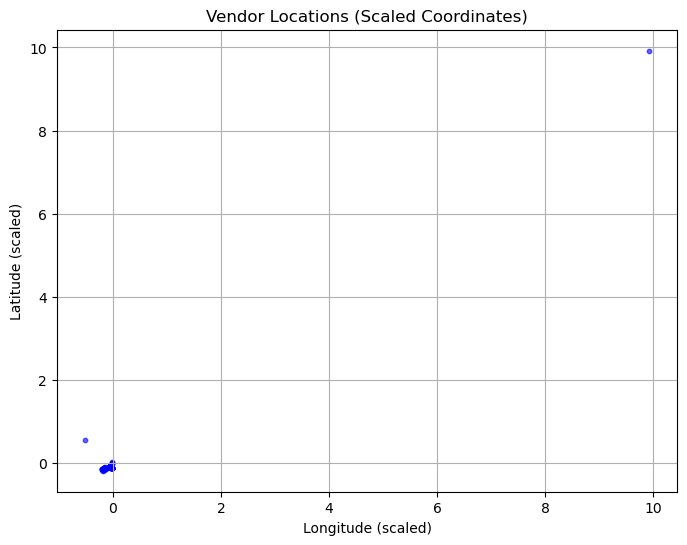

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(vendors['lon_scaled'], vendors['lat_scaled'], alpha=0.6, s=10, c='blue')
plt.title("Vendor Locations (Scaled Coordinates)")
plt.xlabel("Longitude (scaled)")
plt.ylabel("Latitude (scaled)")
plt.grid(True)
plt.show()


In [26]:
#  Remove extreme outliers
vendors_clean = vendors[(vendors['lat_scaled'] < 3) & (vendors['lon_scaled'] < 3)]


In [27]:
from sklearn.cluster import KMeans

# Choose number of clusters (try 3 to 5 first)
kmeans = KMeans(n_clusters=4, random_state=42)
vendors_clean['cluster'] = kmeans.fit_predict(vendors_clean[['lat_scaled', 'lon_scaled']])


c:\Users\dybsb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dybsb\AppData\Local\Temp\ipykernel_23380\1522994081.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendors_clean['cluster'] = kmeans.fit_predict(vendors_clean[['lat_scaled', 'lon_scaled']])


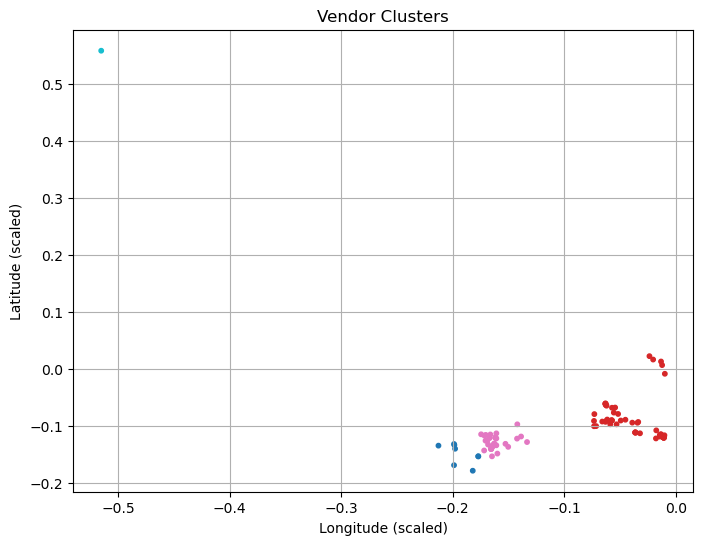

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(vendors_clean['lon_scaled'], vendors_clean['lat_scaled'], 
            c=vendors_clean['cluster'], cmap='tab10', s=10)
plt.title("Vendor Clusters")
plt.xlabel("Longitude (scaled)")
plt.ylabel("Latitude (scaled)")
plt.grid(True)
plt.show()


In [29]:
vendors.head()

,id,authentication_id,latitude,longitude,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,...,"tag_Italian,Pasta,Pizzas,Salads,Sandwiches","tag_Omani,Arabic,Shuwa,Pasta,Rice,Soups,Lebanese","tag_Pizzas,Italian,Breakfast,Soups,Pasta,Salads,Desserts","tag_Sandwiches,Breakfast,Burgers,Mojitos","tag_Sandwiches,Shawarma,Fresh Juices,Mojitos,Milkshakes",tag_Unknown,latitude_scaled,longitude_scaled,lat_scaled,lon_scaled
0,4,118597,-0.588596,0.754434,Restaurants,2,0.0,6,1,11:00AM-11:30PM,...,False,False,False,False,False,False,-0.120214,-0.011255,-0.120214,-0.011255
1,13,118608,-0.471654,0.744470,Restaurants,2,0.7,5,1,08:30AM-10:30PM,...,False,False,False,False,False,False,-0.114509,-0.013531,-0.114509,-0.013531
2,20,118616,-0.407527,0.643681,Restaurants,2,0.0,8,1,08:00AM-10:45PM,...,False,False,False,False,False,False,-0.111380,-0.036565,-0.111380,-0.036565
3,23,118619,-0.585385,0.753811,Restaurants,2,0.0,5,1,10:59AM-10:30PM,...,False,False,False,False,False,False,-0.120058,-0.011397,-0.120058,-0.011397
4,28,118624,0.480602,0.552850,Restaurants,2,0.7,15,1,11:00AM-11:45PM,...,False,False,False,False,False,False,-0.068052,-0.057322,-0.068052,-0.057322
